<a href="https://colab.research.google.com/github/JoaoDiamantino/CarsPricePredict_LightHouse/blob/main/LH_CD_JOAO_DIAMANTINO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.special import inv_boxcox
from sklearn.preprocessing import StandardScaler

# Configurar o tamanho padrão da figura
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

### 2.Carregando os dados

In [ ]:
# carregando dados
train = 'https://raw.githubusercontent.com/JoaoDiamantino/CarsPricePredict_LightHouse/main/cars_train.csv'
test = 'https://raw.githubusercontent.com/JoaoDiamantino/CarsPricePredict_LightHouse/main/cars_test.csv'

df = pd.read_csv(train , sep=";" )
dfTeste = pd.read_csv(test , sep=";" )

### 3.Entendendo os dados

#### 3.1 Análise Descritiva

In [ ]:
df.head(2)

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,"3,00716E+38",8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,7.473.259.008.373.930
1,"2,7964E+38",8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,8.196.533.263.377.470


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

##### 3.1.1 Conversão de variáveis

In [ ]:
# Remover pontos da coluna 'preco' e converter para numérico
df['preco'] = df['preco'].replace('\.', '', regex=True).astype(float)

# Transformar coluna 'num_portas' em categoria
df['num_portas'] = df['num_portas'].astype('category')

# Transformar coluna 'veiculo_alienado' em categoria
df['veiculo_alienado'] = df['veiculo_alienado'].astype('category')

# Transformar colunas boolenas em categoricas
df[['entrega_delivery','troca','elegivel_revisao']] = df[['entrega_delivery','troca','elegivel_revisao']].astype('category')

##### 3.1.2 Tratamento de valores nulos

In [ ]:
# Analisando valores nulos
df.isnull().mean()

id                         0.000000
num_fotos                  0.005983
marca                      0.000000
modelo                     0.000000
versao                     0.000000
ano_de_fabricacao          0.000000
ano_modelo                 0.000000
hodometro                  0.000000
cambio                     0.000000
num_portas                 0.000000
tipo                       0.000000
blindado                   0.000000
cor                        0.000000
tipo_vendedor              0.000000
cidade_vendedor            0.000000
estado_vendedor            0.000000
anunciante                 0.000000
entrega_delivery           0.000000
troca                      0.000000
elegivel_revisao           0.000000
dono_aceita_troca          0.258991
veiculo_único_dono         0.647681
revisoes_concessionaria    0.689968
ipva_pago                  0.335485
veiculo_licenciado         0.462345
garantia_de_fábrica        0.852454
revisoes_dentro_agenda     0.800230
veiculo_alienado           1

In [ ]:
#1 Transformar os nulos da coluna 'num_fotos' na moda dos valores
moda = df['num_fotos'].mode()[0]

df['num_fotos'].fillna(moda, inplace=True)

# aproveitando para remover coluna id
df = df.drop('id', axis =1)
#2 Vamos adicionar 'Não' aos valores nulos das colunas abaixos

FillValues = ['dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica',
       'revisoes_dentro_agenda']

for coluna in FillValues:
    df[coluna].fillna('Não', inplace=True)


#3 dropar coluna 'veiculo_alienado'
df = df.drop('veiculo_alienado', axis =1)

In [ ]:
df.columns

Index(['num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica',
       'revisoes_dentro_agenda', 'preco'],
      dtype='object')

##### 3.1.3 Estatística e Visão Gráfica dos dados

In [ ]:
df.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,preco
count,29584.000000,29584.000000,29584.000000,29584.000000,2.958400e+04
mean,10.309931,2016.758552,2017.808985,58430.592077,1.002299e+16
std,3.481502,4.062422,2.673930,32561.769309,9.547504e+15
min,8.000000,1985.000000,1997.000000,100.000000,2.006292e+10
25%,8.000000,2015.000000,2016.000000,31214.000000,3.196583e+15
50%,8.000000,2018.000000,2018.000000,57434.000000,8.244891e+15
75%,14.000000,2019.000000,2020.000000,81953.500000,1.342533e+16
max,21.000000,2022.000000,2023.000000,390065.000000,6.549912e+16


In [ ]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
object_columns = df.select_dtypes(include=['object','category']).columns.tolist()

print("Colunas numéricas:")
print(numeric_columns)

print("Colunas do tipo objeto:")
print(object_columns)

Colunas numéricas:
['num_fotos', 'ano_de_fabricacao', 'ano_modelo', 'hodometro', 'preco']
Colunas do tipo objeto:
['marca', 'modelo', 'versao', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao', 'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda']


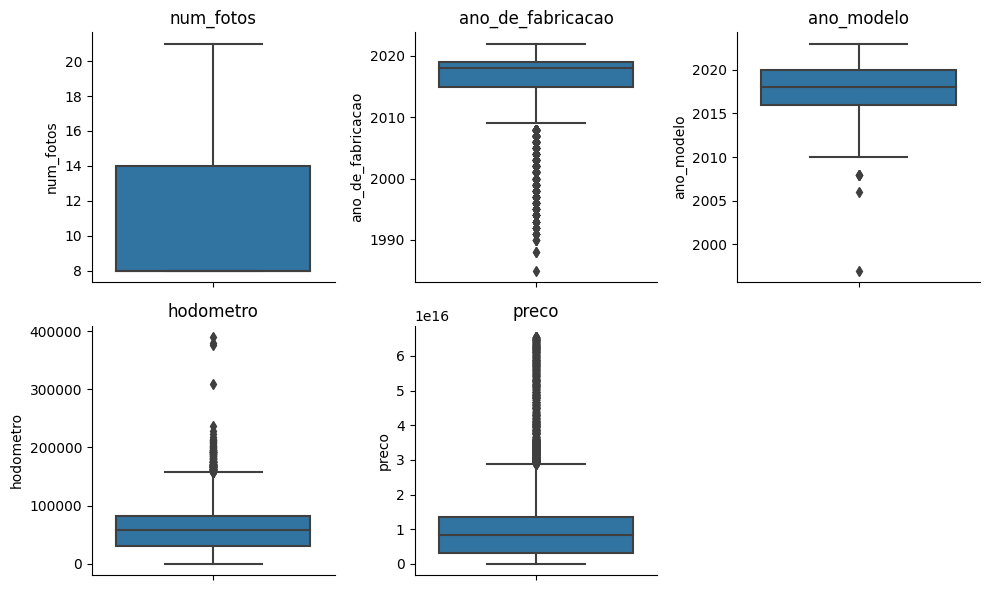

In [ ]:
# Análise Bloxpot das variáveis quantitativas

# Configurar o tamanho da figura
num_plots = len(numeric_columns)
num_rows = 2
num_cols = (num_plots + 1) // 2  # Arredonda para cima a divisão

# Criar gráficos boxplot em duas linhas
fig, axes = plt.subplots(num_rows, num_cols,figsize=(10, 6))

# Flattening das axes para facilitar o loop
axes = axes.flatten()

# Criar gráficos boxplot para cada variável numérica
for i, variavel in enumerate(numeric_columns):
    sns.boxplot(y=variavel, data=df, ax=axes[i])
    axes[i].set_title(variavel)
    sns.despine()

# Remover subplots vazios, se houver
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


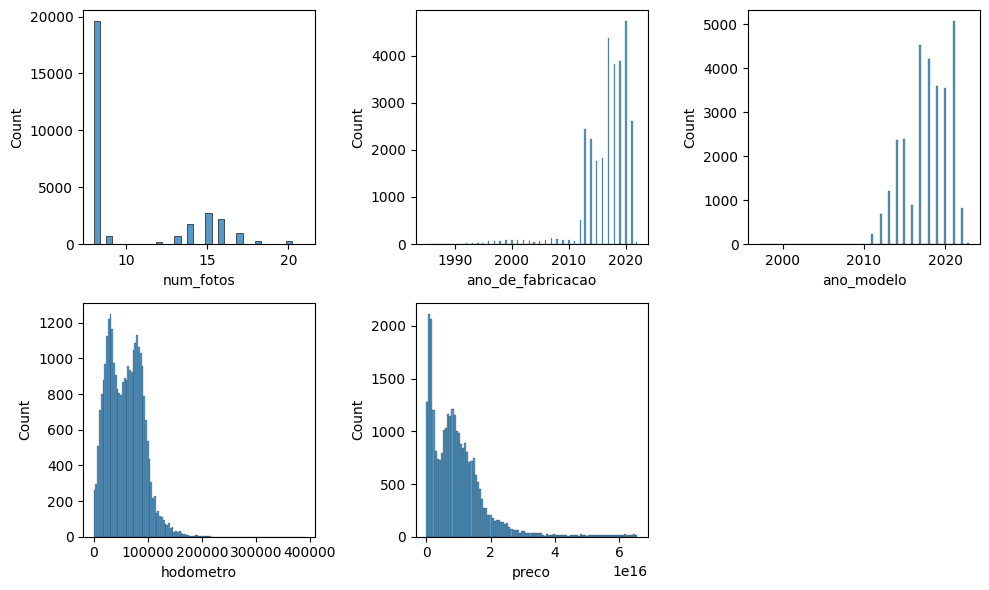

In [ ]:
# Plotar histogramas
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você já tenha lido o arquivo CSV e atribuído os dados a um DataFrame chamado df
# Supondo também que você tenha a variável numeric_columns definida com as colunas numéricas desejadas

# Configurar o tamanho da figura
num_plots = len(numeric_columns)
num_rows = 2
num_cols = (num_plots + 1) // 2  # Arredonda para cima a divisão

# Criar gráficos de histograma para cada coluna numérica
fig, axes = plt.subplots(num_rows, num_cols,figsize=(10, 6))

# Flattening das axes para facilitar o loop
axes = axes.flatten()

# Iterar sobre as colunas numéricas e criar os histogramas
for i, coluna in enumerate(numeric_columns):
    sns.histplot(data=df, x=coluna, ax=axes[i])

# Remover subplots vazios, se houver
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# Contar os valores únicos em cada coluna categórica
for coluna in object_columns:
    counts = df[coluna].value_counts()
    print(f"Valores únicos em {coluna}:")
    print(counts)
    print()


Valores únicos em marca:
VOLKSWAGEN       4594
CHEVROLET        3020
TOYOTA           2180
HYUNDAI          2043
JEEP             2000
FIAT             1918
BMW              1784
AUDI             1698
PEUGEOT          1675
HONDA            1586
MERCEDES-BENZ    1125
FORD             1060
MITSUBISHI        862
LAND ROVER        760
RENAULT           538
NISSAN            438
KIA               408
PORSCHE           349
VOLVO             287
CITROËN           194
TROLLER           177
RAM               168
CHERY             153
JAGUAR            148
MINI              137
LEXUS              75
SUZUKI             41
SUBARU             41
DODGE              37
CHRYSLER           30
SSANGYONG          14
SMART              12
ALFA ROMEO          9
LIFAN               8
MASERATI            7
JAC                 3
IVECO               2
EFFA                1
FERRARI             1
BRM                 1
Name: marca, dtype: int64

Valores únicos em modelo:
COMPASS         1480
2008            1431


##### 3.1.4 Estudo das Correlações

<ipython-input-14-47029e1fbbb7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


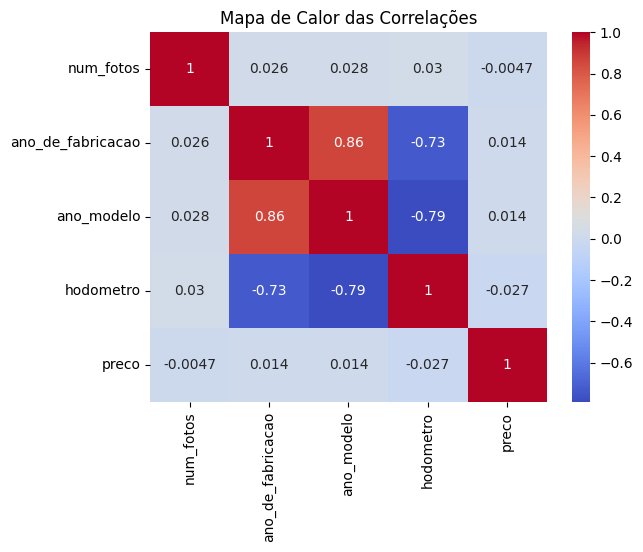

In [ ]:
# Calcular as correlações entre as colunas do DataFrame
correlation_matrix = df.corr()

# Criar o mapa de calor das correlações
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Mapa de Calor das Correlações')
plt.show()

#### 3.2 Análise Exploratória

###### 3.2.1 Venda por Estado x Marca

**Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?**

*Como marca popular iremos considerar: Volkswagen, Fiat, Chevrolet,Citroen, Ford, Peugeot, Renault, Toyota, Honda, Hyunday*

Como mostrado no gráfico abaixo, São Paulo, apesar de não possuir um preço mediano de venda elevado, é o estado com maior número de vendas, com larga frente em relação aos demais estados.

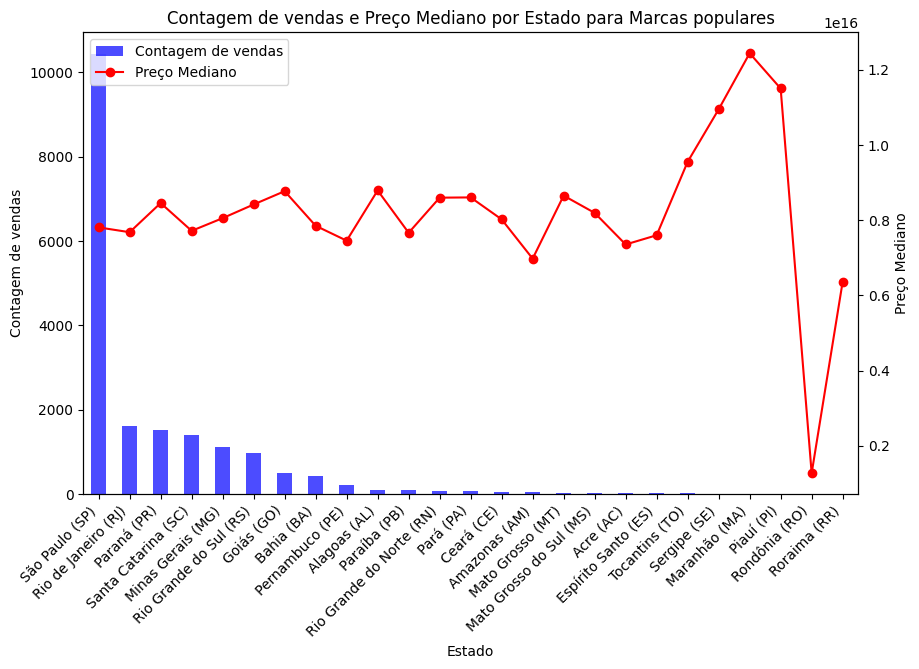

In [ ]:
marca_popular = ['VOLKSWAGEN', 'HYUNDAI','HONDA', 'TOYOTA', 'CITROËN',
       'CHEVROLET', 'FORD', 'PEUGEOT', 'RENAULT', 'FIAT']


# Filtrando o dataset
df_MarcaPopular = df[df['marca'].isin(marca_popular)]

# Groupby por estado_vendedor para contar e calcular a mediana do preço
df_grouped = df_MarcaPopular.groupby('estado_vendedor').agg({'estado_vendedor': 'count', 'preco': 'median'})
df_grouped.columns = ['contagem', 'preco_mediano']

# Ordenar por contagem em ordem decrescente
df_grouped = df_grouped.sort_values('contagem', ascending=False)

# Gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
df_grouped['contagem'].plot(kind='bar', ax=ax, color='blue', alpha=0.7, label='Contagem de vendas')
ax2 = ax.twinx()
df_grouped['preco_mediano'].plot(kind='line', ax=ax2, color='red', marker='o', label='Preço Mediano')

# Configurações do gráfico
ax.set_ylabel('Contagem de vendas')
ax2.set_ylabel('Preço Mediano')
ax.set_xlabel('Estado')
ax.set_title('Contagem de vendas e Preço Mediano por Estado para Marcas populares')
ax.set_xticklabels(df_grouped.index, rotation=45, ha='right')

# Adicionar legenda
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()



###### 3.2.2 Venda por Estado x Tipo x Câmbio

*Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?*

A contar pela disponibilidade de venda já registrada e pelo preço mediano de venda, Minas Gerais é o melhor estado para se comprar uma picape com transmissão automática. Podemos, ainda, mencionar os estados de Alagoas,Mato Grosso e Rio Grande do Norte, que apesar do pouco número de vendas registradas, possuem um preço mediano de venda muito abaixo dos demais estados.

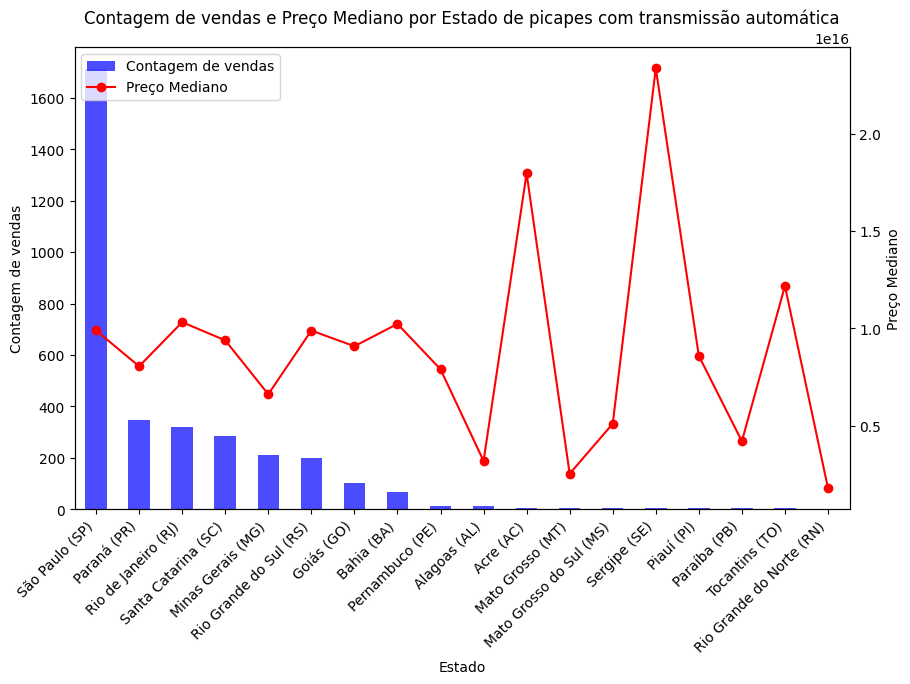

In [ ]:
#filtrar carros picape com cambio automatico
df_filter_picape_auto = df.loc[(df['tipo'] =='Picape')&(df['cambio'] == 'Automática'),:]

# Groupby por estado_vendedor para contar e calcular a mediana do preço
df_grouped = df_filter_picape_auto.groupby('estado_vendedor').agg({'estado_vendedor': 'count', 'preco': 'median'})
df_grouped.columns = ['contagem', 'preco_mediano']

# Ordenar por contagem em ordem decrescente
df_grouped = df_grouped.sort_values('contagem', ascending=False)

# Gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
df_grouped['contagem'].plot(kind='bar', ax=ax, color='blue', alpha=0.7, label='Contagem de vendas')
ax2 = ax.twinx()
df_grouped['preco_mediano'].plot(kind='line', ax=ax2, color='red', marker='o', label='Preço Mediano')

# Configurações do gráfico
ax.set_ylabel('Contagem de vendas')
ax2.set_ylabel('Preço Mediano')
ax.set_xlabel('Estado')
ax.set_title('Contagem de vendas e Preço Mediano por Estado de picapes com transmissão automática')
ax.set_xticklabels(df_grouped.index, rotation=45, ha='right')

# Adicionar legenda
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()


###### 3.2.3 Venda por Estado x Garantia de Fábrica

*Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?*

Apesar de uma quantidade inferior de vendas registradas em relação aos estados de maiores vendas, Pernambuco é o estado com o menor preço mediano de vendas com uma disponibilidade aceitável. Podemos mencionar o estado do Rio de Janeiro, como o estado com menor preço mediano dentre as localidades com mais vendas registradas.

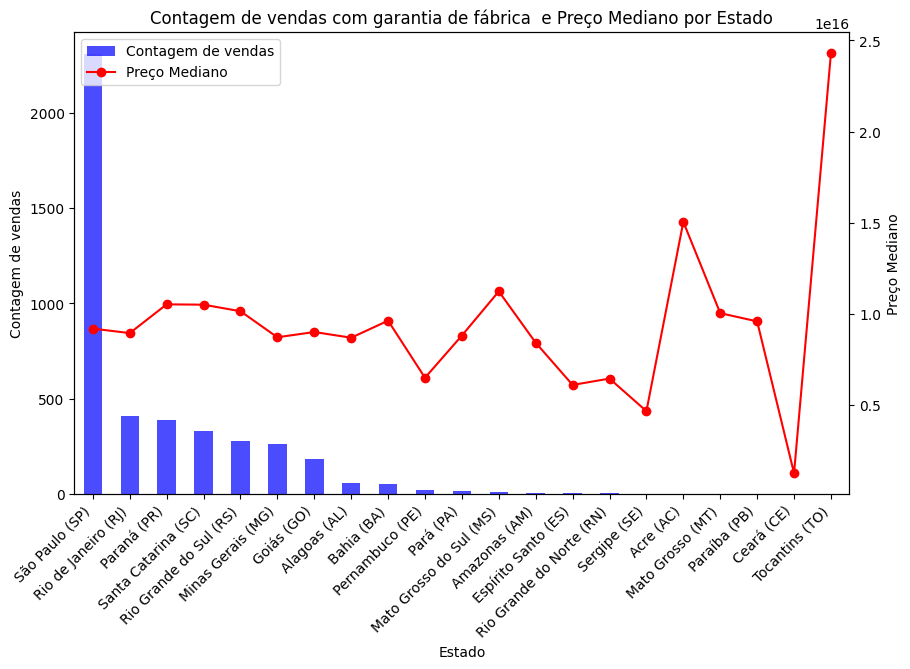

In [ ]:
# Filtrando o dataset de garantia
df_filter_garantia = df[df['garantia_de_fábrica'].isin(['Garantia de fábrica'])]


# Groupby por estado_vendedor para contar e calcular a mediana do preço
df_grouped = df_filter_garantia.groupby('estado_vendedor').agg({'estado_vendedor': 'count', 'preco': 'median'})
df_grouped.columns = ['contagem', 'preco_mediano']

# Ordenar por contagem em ordem decrescente
df_grouped = df_grouped.sort_values('contagem', ascending=False)

# Gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
df_grouped['contagem'].plot(kind='bar', ax=ax, color='blue', alpha=0.7, label='Contagem de vendas')
ax2 = ax.twinx()
df_grouped['preco_mediano'].plot(kind='line', ax=ax2, color='red', marker='o', label='Preço Mediano')

# Configurações do gráfico
ax.set_ylabel('Contagem de vendas')
ax2.set_ylabel('Preço Mediano')
ax.set_xlabel('Estado')
ax.set_title('Contagem de vendas com garantia de fábrica  e Preço Mediano por Estado')
ax.set_xticklabels(df_grouped.index, rotation=45, ha='right')

# Adicionar legenda
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

###### 3.2.4 Vendas por x Cilindrada

*Quais especificações de cilindrada são mais vendidas? Há variações no preço mediano entre eles?*

As especificações de cilindrada mais vendidas são 2.0, 1.6 , 1.0, 1.4 e 1.8, que juntos representam cerca de 77% das vendas. O preço mediano entre eles varia pouco, estando somente o 2.0 com um valor mais alto.

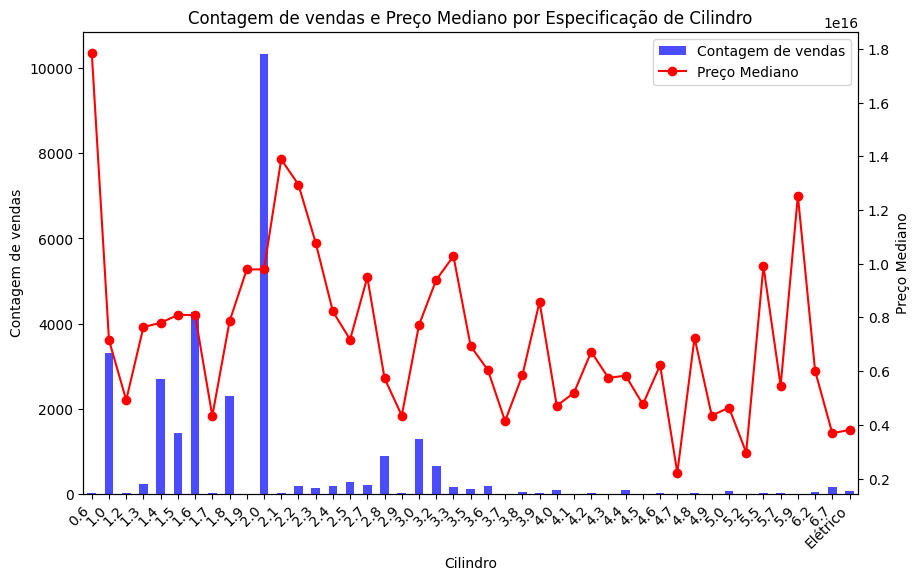


2.0    34.951325
1.6    14.467280
1.0    11.154678
1.4     9.146836
1.8     7.798134
Name: especificacao_cilindrada, dtype: float64
Soma:  77.51825310978909


In [ ]:
# Criar label dos cilindros que correspondem os 3 primeiros caracteres
df['especificacao_cilindrada'] = df['versao'].str[:3]

# Vamos categorizar os carros que não tem cilindros em 'Elétricos'
valores_substituir = ['EV ', 'B12', 'P8 ', 'Z.E', '4S ', 'ELÉ', '90 ', 'TUR', 'BEV']
df['especificacao_cilindrada'] = df['especificacao_cilindrada'].replace(valores_substituir, 'Elétrico')


# Groupby por estado_vendedor para contar e calcular a mediana do preço
df_grouped = df.groupby('especificacao_cilindrada').agg({'especificacao_cilindrada': 'count', 'preco': 'median'})
df_grouped.columns = ['contagem', 'preco_mediano']

# Ordenar por contagem em ordem decrescente
df_grouped = df_grouped.sort_values('especificacao_cilindrada', ascending=True)

# Gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
df_grouped['contagem'].plot(kind='bar', ax=ax, color='blue', alpha=0.7, label='Contagem de vendas')
ax2 = ax.twinx()
df_grouped['preco_mediano'].plot(kind='line', ax=ax2, color='red', marker='o', label='Preço Mediano')

# Configurações do gráfico
ax.set_ylabel('Contagem de vendas')
ax2.set_ylabel('Preço Mediano')
ax.set_xlabel('Cilindro')
ax.set_title('Contagem de vendas e Preço Mediano por Especificação de Cilindro')
ax.set_xticklabels(df_grouped.index, rotation=45, ha='right')

# Adicionar legenda
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

tabela_porcentagem = df['especificacao_cilindrada'].value_counts(normalize=True) * 100
print()
print(tabela_porcentagem.head())
print('Soma: ',tabela_porcentagem.head().sum())



###### 3.2.5 Vendas por x Cor

*Quais cores são mais vendidas? Há variações no preço mediano entre elas?*

As cores mais vendidas são branco, preto, prata e cinza, representando cerca de 99% das vendas. Eles possuem pouca variação de preço mediano.

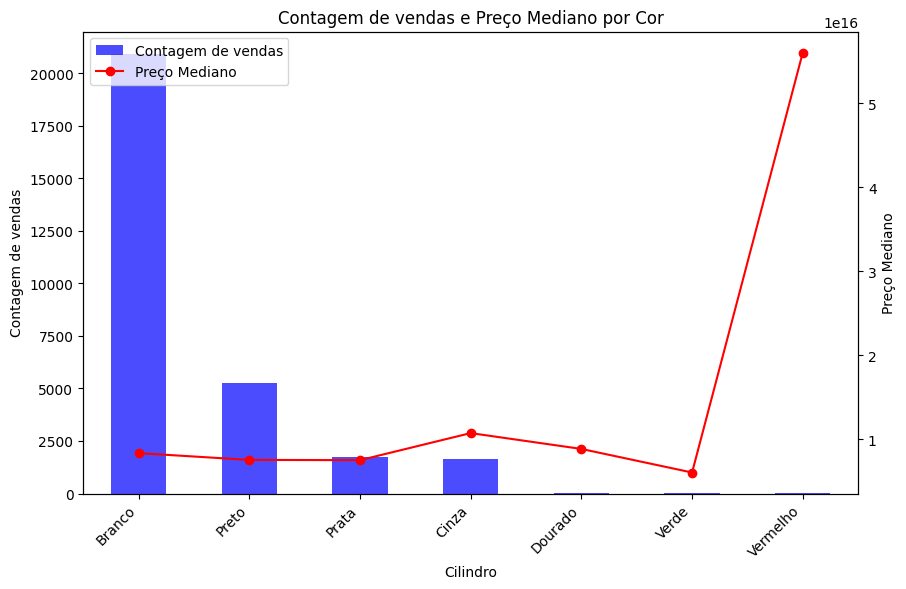


Branco     70.811925
Preto      17.766360
Prata       5.884938
Cinza       5.523256
Dourado     0.006760
Name: cor, dtype: float64
Soma:  99.98647917793402


In [ ]:
# Groupby por estado_vendedor para contar e calcular a mediana do preço
df_grouped = df.groupby('cor').agg({'cor': 'count', 'preco': 'median'})
df_grouped.columns = ['contagem', 'preco_mediano']

# Ordenar por contagem em ordem decrescente
df_grouped = df_grouped.sort_values('contagem', ascending=False)

# Gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
df_grouped['contagem'].plot(kind='bar', ax=ax, color='blue', alpha=0.7, label='Contagem de vendas')
ax2 = ax.twinx()
df_grouped['preco_mediano'].plot(kind='line', ax=ax2, color='red', marker='o', label='Preço Mediano')

# Configurações do gráfico
ax.set_ylabel('Contagem de vendas')
ax2.set_ylabel('Preço Mediano')
ax.set_xlabel('Cilindro')
ax.set_title('Contagem de vendas e Preço Mediano por Cor')
ax.set_xticklabels(df_grouped.index, rotation=45, ha='right')

# Adicionar legenda
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

tabela_porcentagem = df['cor'].value_counts(normalize=True) * 100
print()
print(tabela_porcentagem.head())
print('Soma: ',tabela_porcentagem.head(4).sum())

###### 3.2.6 Vendas por x Hodometro x Dono único

*Carros de dono único tendem a ser muito mais valorizados? Isso sofre variações com os valores do hodômetro?*

Segundo os gráficos, carros de único dono não são tão mais valorizados em relação aos demais. Possuem maior vantagem de vendas em faixas de alto preço com baixo hodômetro, o que garante essa leve superioridade em relação ao preço mediano, justamente por serem essencialmente carros com menor rodagem.

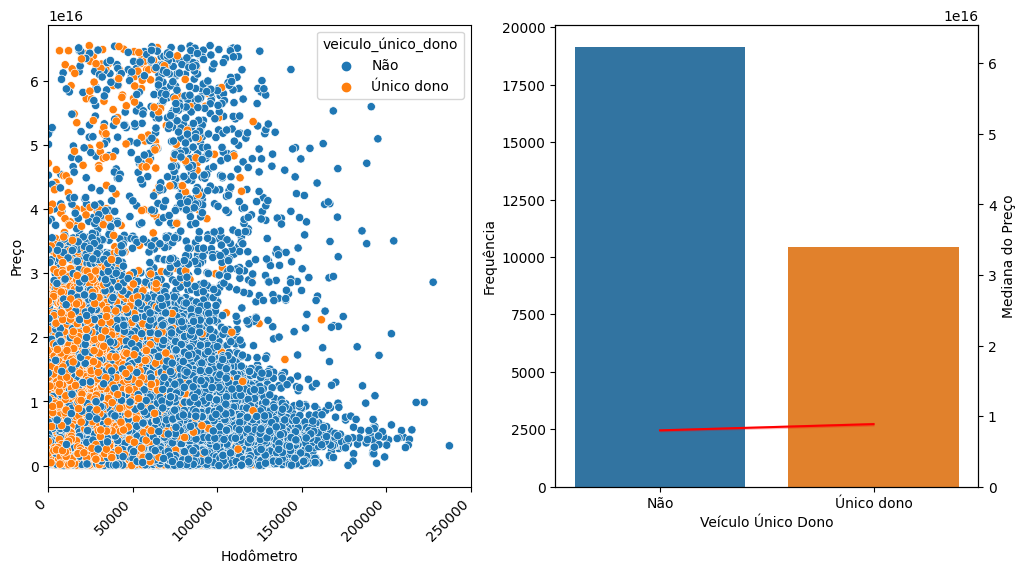

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de dispersão (scatter plot) com eixos invertidos
sns.scatterplot(data=df, y='preco', x='hodometro', hue='veiculo_único_dono', ax=ax1)

# Configurações do eixo x (scatter plot)
ax1.set_xlabel('Hodômetro')
ax1.set_ylabel('Preço')

# Configuração das labels do eixo x (scatter plot)
ax1.set_xticks(range(0, 250001, 50000))
ax1.set_xticklabels(range(0, 250001, 50000), rotation=45, ha='right')

# Limitar os valores do hodômetro até 250000
ax1.set_xlim(0, 250000)

# Gráfico de barras (frequência de veiculo_único_dono)
sns.countplot(data=df, x='veiculo_único_dono', ax=ax2)

# Configurações do eixo x (gráfico de barras)
ax2.set_xlabel('Veículo Único Dono')
ax2.set_ylabel('Frequência')

# Eixo secundário com a mediana do preço
ax2_sec = ax2.twinx()
sns.lineplot(data=df, x='veiculo_único_dono', y='preco', estimator=np.median, ax=ax2_sec, color='red')

# Configurações do eixo y secundário (mediana do preço)
ax2_sec.set_ylabel('Mediana do Preço')
ax2_sec.set_ylim(0, df['preco'].max())

plt.show()






### 4.Pré-processamento dos dados

####4.1 Feature Engineering

#####4.1.1 Novas features de estado

In [ ]:
# Novas features de market share (contagem de vendas) por estado para carros populares
def calcular_market_share_por_estado(df):
    marca_popular = ['VOLKSWAGEN', 'HYUNDAI', 'HONDA', 'TOYOTA', 'CITROËN', 'CHEVROLET', 'FORD', 'PEUGEOT', 'RENAULT', 'FIAT']
    df_filtrado = df[df['marca'].isin(marca_popular)]
    contagem_por_estado = df_filtrado['estado_vendedor'].value_counts()
    market_share_estado = contagem_por_estado / len(df_filtrado)
    df['market_share_pop_estado'] = df['estado_vendedor'].map(market_share_estado)
    return df


df = calcular_market_share_por_estado(df)

print(df[['estado_vendedor', 'market_share_pop_estado']].head())

       estado_vendedor  market_share_pop_estado
0       São Paulo (SP)                 0.554498
1    Minas Gerais (MG)                 0.059017
2       São Paulo (SP)                 0.554498
3       São Paulo (SP)                 0.554498
4  Rio de Janeiro (RJ)                 0.085921


#####4.1.2 Novas features de versão

In [ ]:
# Nova feature de market share (contagem de vendas) por cilindro
def calcular_market_share_cilindro(df):
    df['especificacao_cilindrada'] = df['versao'].str[:3]
    valores_substituir = ['EV ', 'B12', 'P8 ', 'Z.E', '4S ', 'ELÉ', '90 ', 'TUR', 'BEV']
    df['especificacao_cilindrada'] = df['especificacao_cilindrada'].replace(valores_substituir, 'Elétrico')
    market_share_cilindro = df['especificacao_cilindrada'].value_counts() / len(df)
    df['market_share_cilindro'] = df['especificacao_cilindrada'].map(market_share_cilindro)
    return df

df = calcular_market_share_cilindro(df)



# Verificar o resultado
print(df[['especificacao_cilindrada', 'market_share_cilindro']].head())

  especificacao_cilindrada  market_share_cilindro
0                      1.6               0.144673
1                      2.0               0.349513
2                      2.4               0.006220
3                      2.0               0.349513
4                      2.0               0.349513


#####4.1.3 Novas features de marca

In [ ]:
# Nova feature de market share (contagem de vendas) por marca
def calcular_market_share_marca(df):
    market_share_marca = df['marca'].value_counts() / len(df)
    df['market_share_marca'] = df['marca'].map(market_share_marca)
    return df


df = calcular_market_share_marca(df)

# Verificar o resultado
print(df[['marca', 'market_share_marca']].head())
df['preco'].head()

        marca  market_share_marca
0      NISSAN            0.014805
1        JEEP            0.067604
2         KIA            0.013791
3  VOLKSWAGEN            0.155287
4   SSANGYONG            0.000473


0    7.473259e+15
1    8.196533e+15
2    1.628248e+13
3    1.236814e+16
4    8.241976e+14
Name: preco, dtype: float64

####4.2 Padronização das variáveis numéricas preditoras

In [ ]:
from sklearn.preprocessing import StandardScaler

def standartizar_numericas(df):
    # Encontrar as colunas numéricas, excluindo 'preco'
    colunas_numericas = df.select_dtypes(include=['int', 'float']).columns

    # Aplicar a padronização nas colunas numéricas, exceto 'preco'
    scaler = StandardScaler()
    df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

    return df

df_preco = df['preco']
df = standartizar_numericas(df).drop('preco', axis =1)
df['preco'] = df_preco

print(df[df.select_dtypes(include=['int', 'float']).columns].head())

   num_fotos  ano_de_fabricacao  ano_modelo  hodometro  \
0  -0.663498           0.059436   -0.302550   0.286888   
1  -0.663498           0.059436   -0.302550   0.139688   
2   1.634400           0.305598    0.445425  -0.441034   
3   1.059925          -0.925215   -1.050526   0.826947   
4  -0.663498          -0.925215   -1.050526   0.401103   

   market_share_pop_estado  market_share_cilindro  market_share_marca  \
0                 0.895934              -0.236220           -1.328843   
1                -1.125400               1.307590           -0.100577   
2                 0.895934              -1.279694           -1.352434   
3                 0.895934               1.307590            1.939193   
4                -1.015646               1.307590           -1.662252   

          preco  
0  7.473259e+15  
1  8.196533e+15  
2  1.628248e+13  
3  1.236814e+16  
4  8.241976e+14  


In [ ]:


def transform_outliers(df, min_std=3):


    transformed_df = df.copy()  # Cria uma cópia do DataFrame para evitar alterações no DataFrame original

    # Selecionar colunas numéricas
    colunas_numericas = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32'])

    for column in colunas_numericas.columns:
        # Cálculo do IQR e dos limites inferior e superior
        Q1 = transformed_df[column].quantile(0.25)
        Q3 = transformed_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - min_std * IQR
        upper_bound = Q3 + min_std * IQR

        # Substituição dos outliers pelos valores mais próximos dentro do intervalo aceitável
        transformed_df[column] = np.where(transformed_df[column] < lower_bound, lower_bound, transformed_df[column])
        transformed_df[column] = np.where(transformed_df[column] > upper_bound, upper_bound, transformed_df[column])

    return transformed_df



df_transformed = transform_outliers(df, min_std=3)
df_transformed['preco'] = df['preco']
df = df_transformed



####4.3 Label Encode

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_categoricas(df):
    df_drop = df.drop(['modelo', 'versao', 'cidade_vendedor', 'marca', "estado_vendedor", 'especificacao_cilindrada','cor'], axis=1)
    # Encontrar as colunas categóricas e booleanas
    colunas_categoricas = df_drop.select_dtypes(include=['object', 'bool', 'category']).columns

    # Criar uma instância do OneHotEncoder
    encoder = OneHotEncoder(sparse=False)

    # Aplicar One-Hot Encoding nas colunas categóricas e booleanas
    encoded_features = encoder.fit_transform(df[colunas_categoricas])

    # Obter os nomes das colunas encodadas
    encoded_column_names = encoder.get_feature_names_out(colunas_categoricas)

    # Criar um novo DataFrame com as colunas transformadas
    df_encoded = pd.concat([df.drop(colunas_categoricas, axis=1), pd.DataFrame(encoded_features, columns=encoded_column_names)], axis=1)

    return df_encoded




df = one_hot_encode_categoricas(df)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


####4.4 Escolha de variáveis

##### 4.4.1 Nova correlação

<ipython-input-27-bffdeb89f4e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


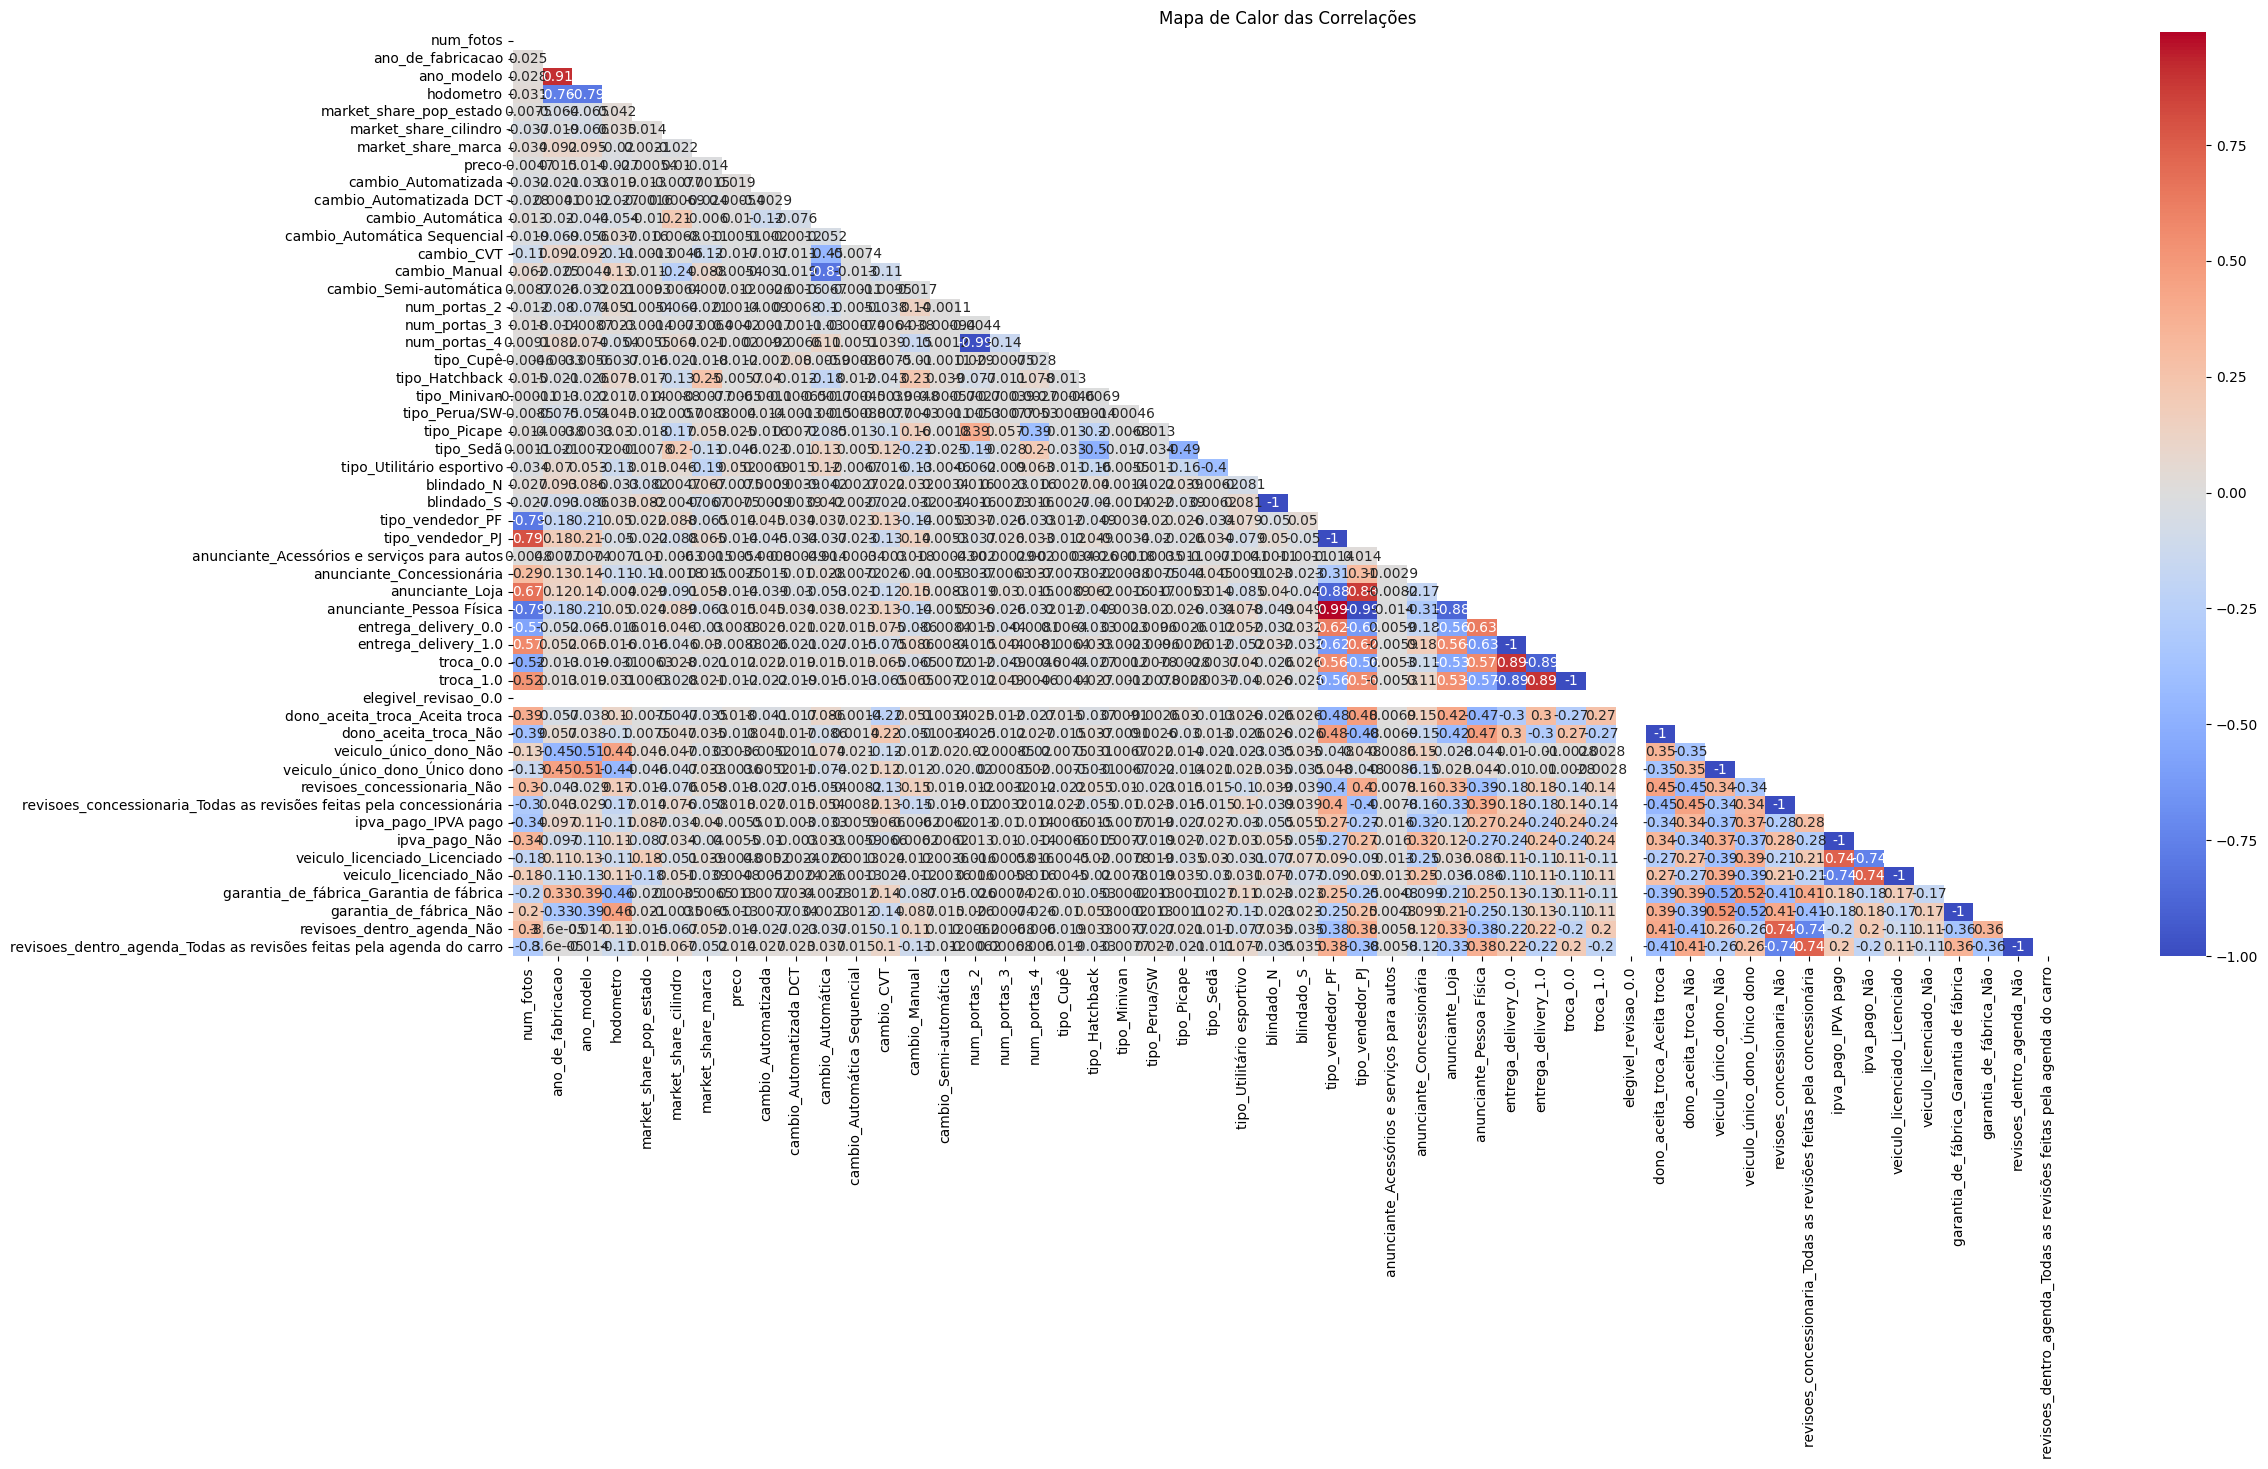

In [ ]:
# Calcular as correlações entre as colunas do DataFrame
correlation_matrix = df.corr()

# Criar o mapa de calor das correlações
fig, ax = plt.subplots(figsize=(25, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax, mask=mask)

plt.title('Mapa de Calor das Correlações')
plt.show()


##### 4.4.2 Transformação Box-Cox da variável preço

In [ ]:
from scipy.stats import boxcox

# Aplicar a transformação de Box-Cox na variável alvo (y)
y_transformed, lambda_ = boxcox(df['preco'])

# Armazenar o valor de lambda para uso futuro
lambda_value = lambda_

# Substituir a variável alvo (y) pelos valores transformados
df['preco'] = y_transformed


#### 4.5 Divisão de base de treino e teste

variável target

In [ ]:
y = df['preco']

In [ ]:

X = df.drop(['preco','modelo','versao','ano_de_fabricacao','ano_modelo','cidade_vendedor','marca',"estado_vendedor"
              ,'especificacao_cilindrada',"tipo_vendedor_PJ", 'entrega_delivery_1.0','cor'], axis =1)

# acrescentando variável que apareceu na base de teste
X['tipo_Conversível'] = 0
X.head(2)

,num_fotos,hodometro,market_share_pop_estado,market_share_cilindro,market_share_marca,cambio_Automatizada,cambio_Automatizada DCT,cambio_Automática,cambio_Automática Sequencial,cambio_CVT,...,revisoes_concessionaria_Todas as revisões feitas pela concessionária,ipva_pago_IPVA pago,ipva_pago_Não,veiculo_licenciado_Licenciado,veiculo_licenciado_Não,garantia_de_fábrica_Garantia de fábrica,garantia_de_fábrica_Não,revisoes_dentro_agenda_Não,revisoes_dentro_agenda_Todas as revisões feitas pela agenda do carro,tipo_Conversível
0,-0.663498,0.286888,0.895934,-0.23622,-1.328843,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
1,-0.663498,0.139688,-1.125400,1.30759,-0.100577,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 5.Modelos

#### 5.1 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Criar uma instância do modelo de Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
random_forest.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = random_forest.predict(X_test)



In [ ]:
# Aplicar a reversão de Box-Cox nas previsões
y_pred_inv = inv_boxcox(y_pred, lambda_value)

# Aplicar a reversão de Box-Cox nos valores reais
y_test_inv = inv_boxcox(y_test, lambda_value)

# Calcular as métricas usando os valores
mae_inv = mean_absolute_error(y_test_inv, y_pred_inv)
mse_inv = mean_squared_error(y_test_inv, y_pred_inv)
rmse_inv = np.sqrt(mse_inv)
r2_inv = r2_score(y_test_inv, y_pred_inv)

# Imprimir as métricas destransformadas
print('Mean Absolute Error :', mae_inv)
print('Mean Squared Error :', mse_inv)
print('Root Mean Squared Error :', rmse_inv)
print('R^2 :', r2_inv)



Mean Absolute Error : 6635497073606232.0
Mean Squared Error : 1.0489034518338313e+32
Root Mean Squared Error : 1.0241598761100882e+16
R^2 : -0.12972507249300969


#### 5.1 XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

# Criar uma instância do modelo XGBoost Regressor
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
xgb_regressor.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = xgb_regressor.predict(X_test)

# Aplicar a reversão de Box-Cox nas previsões
y_pred_inv = inv_boxcox(y_pred, lambda_value)

# Aplicar a reversão de Box-Cox nos valores reais
y_test_inv = inv_boxcox(y_test, lambda_value)

# Calcular as métricas usando os valores destransformados
mae_inv = mean_absolute_error(y_test_inv, y_pred_inv)
mse_inv = mean_squared_error(y_test_inv, y_pred_inv)
rmse_inv = np.sqrt(mse_inv)
r2_inv = r2_score(y_test_inv, y_pred_inv)

# Imprimir as métricas destransformadas
print('Mean Absolute Error (Destransformado):', mae_inv)
print('Mean Squared Error (Destransformado):', mse_inv)
print('Root Mean Squared Error (Destransformado):', rmse_inv)
print('R^2 (Destransformado):', r2_inv)


Mean Absolute Error (Destransformado): 6574387109692703.0
Mean Squared Error (Destransformado): 1.0343175717081726e+32
Root Mean Squared Error (Destransformado): 1.0170140469571562e+16
R^2 (Destransformado): -0.11401530010783456


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Criar uma instância do modelo de regressão linear
linear_regression = LinearRegression()

# Treinar o modelo
linear_regression.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = linear_regression.predict(X_test)

# Aplicar a reversão de Box-Cox nas previsões
y_pred_inv = inv_boxcox(y_pred, lambda_value)

# Aplicar a reversão de Box-Cox nos valores reais
y_test_inv = inv_boxcox(y_test, lambda_value)

# Calcular as métricas usando os valores
mae_inv = mean_absolute_error(y_test_inv, y_pred_inv)
mse_inv = mean_squared_error(y_test_inv, y_pred_inv)
rmse_inv = np.sqrt(mse_inv)
r2_inv = r2_score(y_test_inv, y_pred_inv)

# Imprimir as métricas destransformadas
print('Mean Absolute Error (MAE):', mae_inv)
print('Mean Squared Error (MSE):', mse_inv)
print('Root Mean Squared Error (RMSE):', rmse_inv)
print('R-squared (R²):', r2_inv)


Mean Absolute Error (MAE): 6409700127887982.0
Mean Squared Error (MSE): 1.0030986673996093e+32
Root Mean Squared Error (RMSE): 1.0015481353382918e+16
R-squared (R²): -0.08039087178558768




### 6. Processando arquivo de teste

In [ ]:
df = dfTeste

In [ ]:
#1 Conversão de variáveis

df['num_portas'] = df['num_portas'].astype('category')

df['veiculo_alienado'] = df['veiculo_alienado'].astype('category')

df[['entrega_delivery','troca','elegivel_revisao']] = df[['entrega_delivery','troca','elegivel_revisao']].astype('category')

In [ ]:
#2 Tratar Nulos
moda = df['num_fotos'].mode()[0]

df['num_fotos'].fillna(moda, inplace=True)

df = df.drop('id', axis =1)

FillValues = ['dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica',
       'revisoes_dentro_agenda']

for coluna in FillValues:
    df[coluna].fillna('Não', inplace=True)

df = df.drop('veiculo_alienado', axis =1)

In [ ]:
df = calcular_market_share_por_estado(df)
df = calcular_market_share_cilindro(df)
df = calcular_market_share_marca(df)
df = standartizar_numericas(df)
df = transform_outliers(df, min_std=3)
df = one_hot_encode_categoricas(df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X = df.drop(['modelo','versao','ano_de_fabricacao','ano_modelo','cidade_vendedor','marca',"estado_vendedor"
              ,'especificacao_cilindrada',"tipo_vendedor_PJ", 'entrega_delivery_1.0','cor'], axis =1)
X.head(2)

,num_fotos,hodometro,market_share_pop_estado,market_share_cilindro,market_share_marca,cambio_Automatizada,cambio_Automatizada DCT,cambio_Automática,cambio_Automática Sequencial,cambio_CVT,...,revisoes_concessionaria_Não,revisoes_concessionaria_Todas as revisões feitas pela concessionária,ipva_pago_IPVA pago,ipva_pago_Não,veiculo_licenciado_Licenciado,veiculo_licenciado_Não,garantia_de_fábrica_Garantia de fábrica,garantia_de_fábrica_Não,revisoes_dentro_agenda_Não,revisoes_dentro_agenda_Todas as revisões feitas pela agenda do carro
0,-0.668237,-1.169117,0.903709,-0.281109,-1.328321,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.224973,-0.159832,-1.352383,-0.631922,-0.251032,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0



### 7. Predict e Save

In [ ]:

# mudar coluna de posição para ficar igual ao treino
coluna_conversivel = X.pop('tipo_Conversível')
X['tipo_Conversível'] = coluna_conversivel

# Fazer previsões no conjunto de teste
y_pred = random_forest.predict(X)

# Aplicar a reversão de Box-Cox nas previsões
y_pred_inv = inv_boxcox(y_pred, lambda_value)

# Criar DataFrame com as colunas id e preco
resultado = pd.DataFrame({'id': dfTeste['id'], 'preco': y_pred_inv})

# Salvar o DataFrame em um arquivo CSV
resultado.to_csv('predicted.csv', index=False)


In [ ]:
resultado.describe()

,preco
count,9.862000e+03
mean,7.554488e+15
std,2.384264e+15
min,1.125970e+15
25%,5.928864e+15
50%,7.286448e+15
75%,8.874992e+15
max,2.518272e+16


In [ ]:
pip install pipreqs

In [ ]:
pipreqs .

SyntaxError: ignored

In [ ]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>